In [3]:
import pandas as pd
import yfinance as yf
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math

plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("fivethirtyeight")

In [22]:
aapl = yf.download("AAPL", start="2015-01-01", end="2020-01-01").reset_index()

/home/jupyter/.cache/pypoetry/virtualenvs/compare-multiple-backtests-2J6ybkfi-py3.10/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [23]:
aapl[["dcl", "dcm", "dcu"]] = aapl.ta.donchian(lower_length=50, upper_length=100)
aapl = aapl.dropna()
aapl = aapl.set_index("Date")
aapl.index = pd.to_datetime(aapl.index)

aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,dcl,dcm,dcu
Date,,,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.147987,48478800,58.299999,64.761251,71.222504
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519913,93121200,58.299999,65.397501,72.495003
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493164,146266000,58.380001,65.936251,73.492500
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911545,144114400,58.572498,66.032499,73.492500
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.429657,100805600,59.314999,66.403749,73.492500


Text(0, 0.5, 'Close')

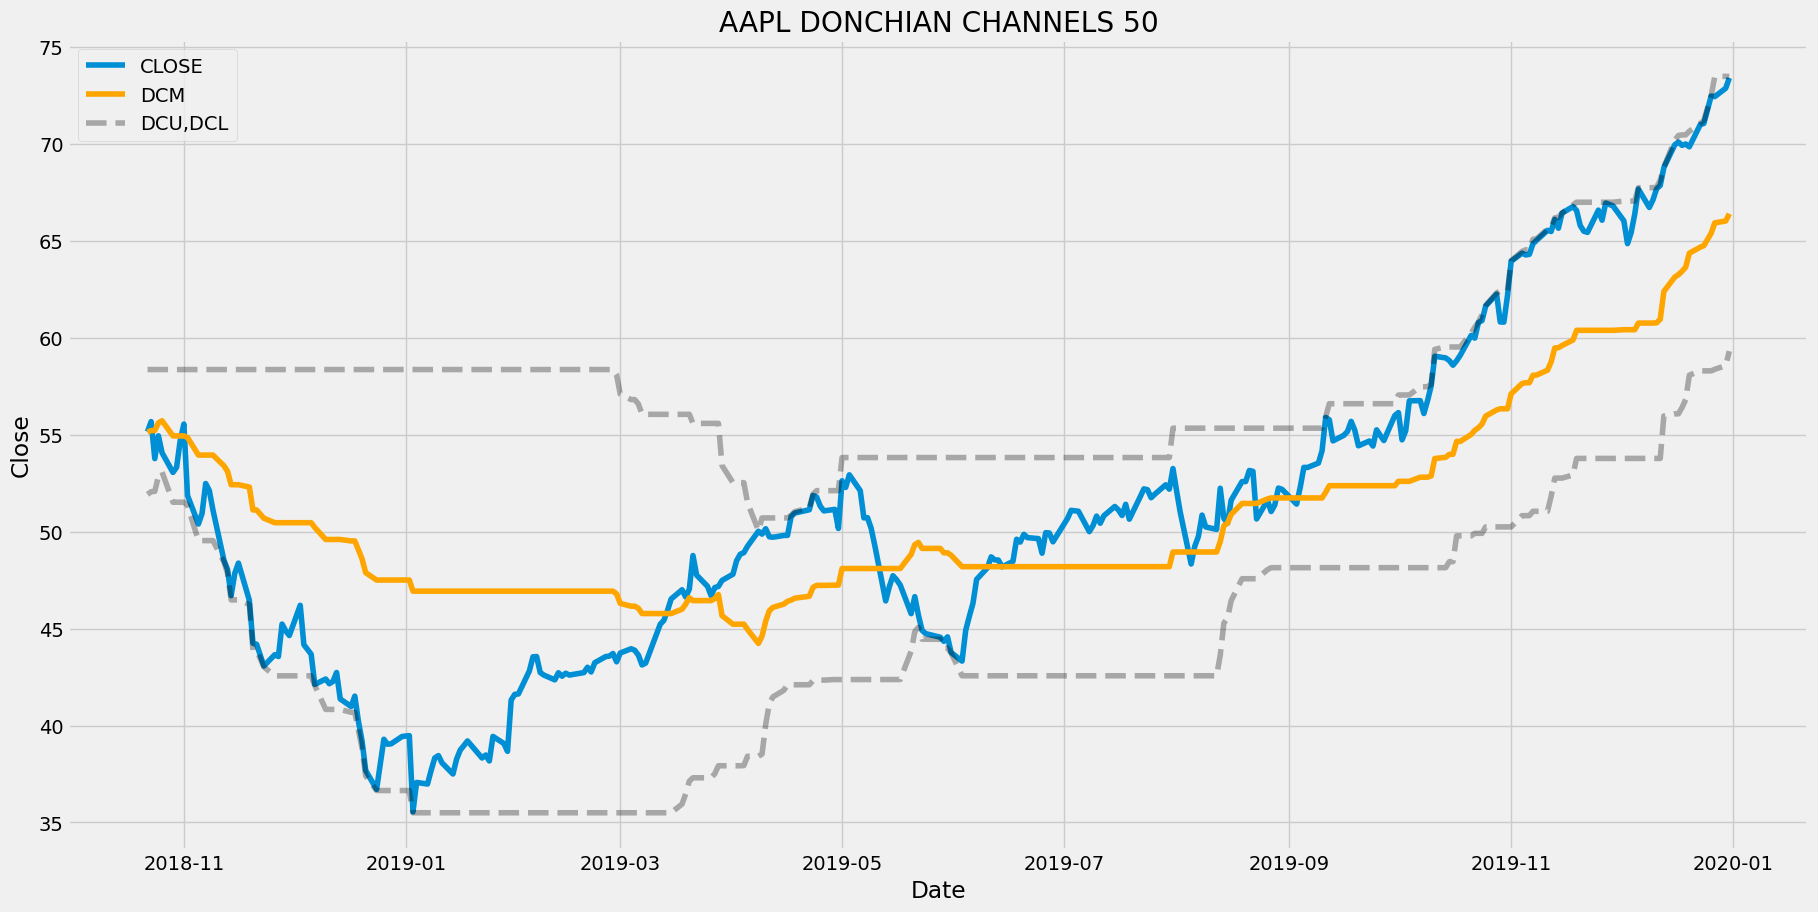

In [24]:
plt.plot(aapl[-300:].Close, label="CLOSE")
plt.plot(aapl[-300:].dcl, color="black", linestyle="--", alpha=0.3)
plt.plot(aapl[-300:].dcm, color="orange", label="DCM")
plt.plot(aapl[-300:].dcu, color="black", linestyle="--", alpha=0.3, label="DCU,DCL")
plt.legend()
plt.title("AAPL DONCHIAN CHANNELS 50")
plt.xlabel("Date")
plt.ylabel("Close")

In [25]:
def implement_strategy(aapl, investment):

    in_position = False
    equity = investment

    for i in range(3, len(aapl)):
        if aapl["High"][i] == aapl["dcu"][i] and in_position == False:
            no_of_shares = math.floor(equity / aapl.Close[i])
            equity -= no_of_shares * aapl.Close[i]
            in_position = True
            print(
                cl("BUY: ", color="green", attrs=["bold"]),
                f"{no_of_shares} Shares are bought at ${aapl.Close[i]} on {str(aapl.index[i])[:10]}",
            )
        elif aapl["Low"][i] == aapl["dcl"][i] and in_position == True:
            equity += no_of_shares * aapl.Close[i]
            in_position = False
            print(
                cl("SELL: ", color="red", attrs=["bold"]),
                f"{no_of_shares} Shares are bought at ${aapl.Close[i]} on {str(aapl.index[i])[:10]}",
            )
    if in_position == True:
        equity += no_of_shares * aapl.Close[i]
        print(
            cl(
                f"\nClosing position at {aapl.Close[i]} on {str(aapl.index[i])[:10]}",
                attrs=["bold"],
            )
        )
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f"EARNING: ${earning} ; ROI: {roi}%", attrs=["bold"]))


implement_strategy(aapl, 100000)

BUY:  3578 Shares are bought at $27.9424991607666 on 2016-09-14
SELL:  3578 Shares are bought at $41.74250030517578 on 2018-01-30
BUY:  3349 Shares are bought at $44.59749984741211 on 2018-02-27
SELL:  3349 Shares are bought at $40.58000183105469 on 2018-04-27
BUY:  2957 Shares are bought at $45.95750045776367 on 2018-05-04
SELL:  2957 Shares are bought at $53.060001373291016 on 2018-10-29
BUY:  3136 Shares are bought at $50.025001525878906 on 2019-04-08
SELL:  3136 Shares are bought at $44.915000915527344 on 2019-05-23
BUY:  2645 Shares are bought at $53.2599983215332 on 2019-07-31

Closing position at 73.4124984741211 on 2019-12-31
EARNING: $94202.3 ; ROI: 94.2%


/var/tmp/ipykernel_580445/597208389.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if aapl['High'][i] == aapl['dcu'][i] and in_position == False:
/var/tmp/ipykernel_580445/597208389.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif aapl['Low'][i] == aapl['dcl'][i] and in_position == True:
/var/tmp/ipykernel_580445/597208389.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_of_shares = math.floor(equity/aapl.Close[i